###Nama         : Septavia Navis

###NIM 		     : 212410103039

###Kelas 	     : Kecerdasan Komputasional B

                                  Modul 5 Praktikum Data Mining

                                       K means clustering

**TUGAS**

Lakukan clustering pada dataset iris. Langkah-langkahnya adalah sebagai berikut:
1. Normalisasikan dataset iris menggunakan normalisasi minmax
2. Tampilkan scatter plot sebelum clustering
3. Clusterlah dataset iris dengan nilai K 2, 3, 4
4. Tampilkan scatter plot setelah clustering
5. Analisalah perbandingan scatter plot sebelum clustering dan setelah clustering
6. Tentukan manakah k terbaik jika dilakukan analisa secara visual

Tugas no 1 – 6 dilakukan terhadap kombinasi attribut:

- sepal length ~sepal width
- sepal length ~petal width
- sepal width ~petal width
- petal length ~petal width

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

- ***NumPy (np)*** adalah library yang digunakan untuk melakukan operasi matematika pada array dan matriks dalam Python.

- ***Pandas (pd)*** adalah library yang digunakan untuk melakukan manipulasi data seperti membaca file CSV, mengakses kolom atau baris tertentu dalam dataset, dan sebagainya.

- ***sklearn.datasets.load_iris*** digunakan untuk memuat dataset iris.

- ***KMeans*** dari modul ***sklearn.cluster*** digunakan untuk melakukan clustering dengan algoritma K-Means.

- ***MinMaxScaler*** dari ***sklearn.preprocessing*** digunakan untuk melakukan normalisasi data.

- ***Matplotlib.pyplot*** digunakan untuk membuat plot visualisasi pada data.

In [ ]:
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Kode diatas melakukan load dataset iris dari sk-learn menggunakan fungsi load_iris() dan kemudian membuat dataframe dari data iris tersebut menggunakan fungsi ***pd.DataFrame()***. Dataframe tersebut diberi nama iris_data. Kolom pada dataframe diisi dengan nama fitur pada iris menggunakan ***iris.feature_names***. ***head()*** digunakan untuk menampilkan lima baris pertama dari dataframe.

---

###**sepal length ~sepal width**

In [ ]:
data = iris_data[['sepal length (cm)', 'sepal width (cm)']]
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


Pada kode di atas, dibuat sebuah variabel data yang berisi data ***iris_data*** yang hanya memuat kolom sepal length (cm) dan sepal width (cm) menggunakan method [['sepal length (cm)', 'sepal width (cm)']]. Kemudian ditampilkan 5 baris pertama data tersebut menggunakan method head().

1. **Normalisasikan dataset iris menggunakan normalisasi minmax**

In [ ]:
scaler = MinMaxScaler()
iris_data_scaled = scaler.fit_transform(iris_data[['sepal length (cm)', 'sepal width (cm)']])
data = pd.DataFrame(iris_data_scaled, columns=['sepal length (cm)', 'sepal width (cm)'])
data.head()

,sepal length (cm),sepal width (cm)
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667


- ***scaler = MinMaxScaler()*** : Membuat objek MinMaxScaler dari library Scikit-Learn untuk melakukan normalisasi data.
- ***iris_data_scaled = scaler.fit_transform(iris_data[['sepal length (cm)', 'sepal width (cm)']])*** : Melakukan normalisasi data iris pada atribut sepal length dan sepal width menggunakan objek MinMaxScaler yang telah dibuat sebelumnya. Data hasil normalisasi disimpan pada variabel iris_data_scaled.
- ***data = pd.DataFrame(iris_data_scaled, columns=['sepal length (cm)', 'sepal width (cm)'])*** : Membuat DataFrame baru dari data hasil normalisasi dengan kolom atribut yang sama seperti pada data awal (sepal length (cm) dan sepal width (cm)). DataFrame ini disimpan pada variabel data.
- ***data.head()*** : Menampilkan lima baris pertama dari data hasil normalisasi yang telah dibuat.

2. **Tampilkan scatter plot sebelum clustering**

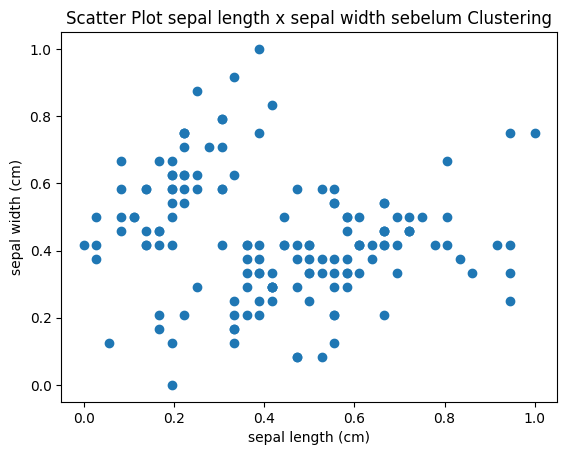

In [ ]:
plt.scatter(iris_data_scaled[:, 0], iris_data_scaled[:, 1])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Scatter Plot sepal length x sepal width sebelum Clustering')
plt.show()

- ***plt.scatter(iris_data_scaled[:, 0], iris_data_scaled[:, 1])*** = Menampilkan scatter plot dengan sumbu x dari sepal length dan sumbu y dari sepal width yang sudah di normalisasi menggunakan MinMaxScaler. Data yang digunakan berasal dari dataset iris.
- ***plt.xlabel('sepal length (cm)')*** = Pemberian label sumbu x
- ***plt.ylabel('sepal width (cm)')*** = Pemberian label sumbu y
- ***plt.title('Scatter Plot sepal length x sepal width sebelum Clustering')*** = Pemberian judul pada plot
- ***plt.show()*** = Menampilkan plot dengan menggunakan fungsi **show()** 

Scatter plot ini menunjukkan hubungan antara sepal length dan sepal width pada dataset iris sebelum dilakukan clustering.

3. **Clusterlah dataset iris dengan nilai K 2, 3, 4**

In [ ]:
k_values = [2, 3, 4]
y_values = []
centroid_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    y = kmeans.fit_predict(iris_data_scaled)
    y_values.append(y)
    centroid_values.append(kmeans.cluster_centers_)

for i, y in enumerate(y_values):
  print(f'Cluster Data dengan Nilai K={k_values[i]}\n{y}\n')
  print(f'Nilai pada cluster {k_values[i]}:\n{centroid_values[i]}\n')

Cluster Data dengan Nilai K=2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]

Nilai pada cluster 2:
[[0.20402299 0.55172414]
 [0.57035024 0.37047101]]

Cluster Data dengan Nilai K=3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 2 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]

Nilai pada cluster 3:
[[0.19897959 0.60459184]
 [0.69562648 0.45390071]
 [0.40483539 0.28009259]]

Cluster Data dengan Nilai K=4
[3 0 0 0 3 3 3 3 0 0 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 0 3 3 3 0 0 3
 3 0 3 3 0 0 3 3 0 3 0 3 3 1 1 1 2 2 2 1 0 1 0 0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


- ***k_values = [2, 3, 4]*** = Mendefinisikan list k_values yang berisi nilai K yang akan digunakan pada algoritma KMeans.
- ***y_values = []*** = Mendefinisikan list kosong y_values yang akan digunakan untuk menyimpan nilai label cluster setiap iterasi KMeans.
- ***centroid_values = []*** = Mendefinisikan list kosong centroid_values yang akan digunakan untuk menyimpan nilai centroid setiap iterasi KMeans.
- ***for k in k_values:*** = Melakukan iterasi pada setiap nilai K pada k_values.
- ***kmeans = KMeans(n_clusters=k, random_state=0)*** = Mendefinisikan objek KMeans dengan parameter n_clusters sebesar nilai K dan random_state sebesar 0.
- ***y = kmeans.fit_predict(iris_data_scaled)*** = Melakukan fitting dan prediksi pada data yang telah dinormalisasi menggunakan objek KMeans. Hasil prediksi akan disimpan pada variabel y.
- ***y_values.append(y)*** = Menambahkan nilai y pada list y_values.
- ***centroid_values.append(kmeans.cluster_centers_)*** = Menambahkan nilai centroid dari hasil fitting pada iris_data_scaled pada list centroid_values.
- ***for i, y in enumerate(y_values):*** = Melakukan iterasi pada setiap elemen pada y_values dengan indexnya disimpan pada variabel i dan nilai elemennya disimpan pada variabel y.
- ***print(f'Cluster Data dengan Nilai K={k_values[i]}\n{y}\n')*** = Mencetak nilai label cluster pada setiap iterasi KMeans.
- ***print(f'Nilai pada cluster {k_values[i]}:\n{centroid_values[i]}\n')*** = Mencetak nilai centroid pada setiap iterasi KMeans.

4. **Tampilkan scatter plot setelah clustering**

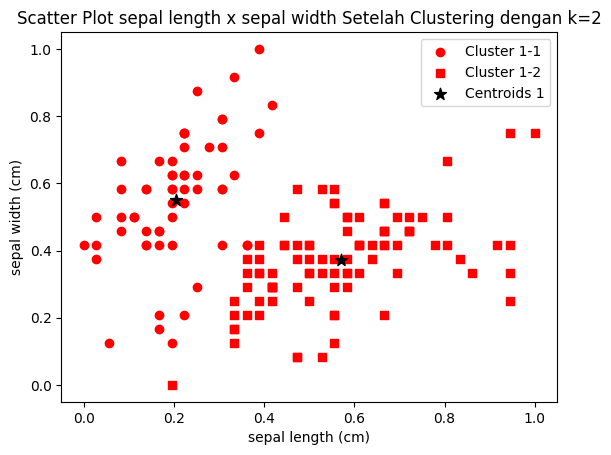

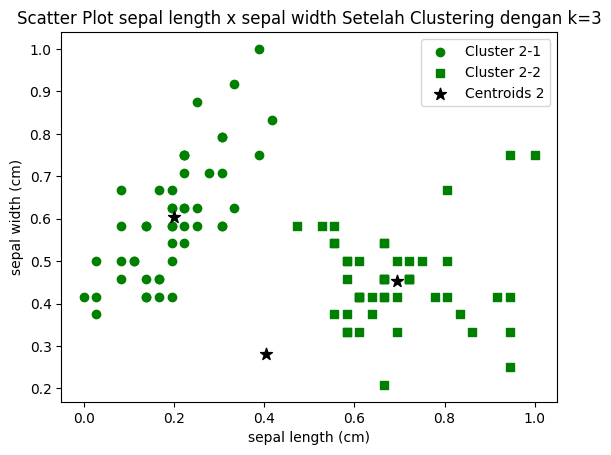

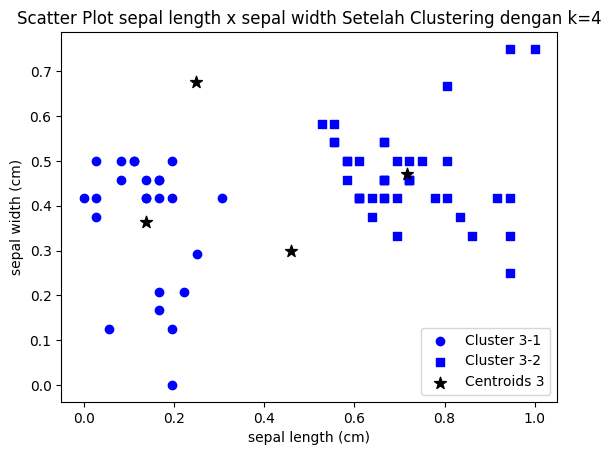

In [ ]:
colors = ['r', 'g', 'b']
for i, y in enumerate(y_values):
    plt.scatter(iris_data_scaled[:, 0][y == 0], iris_data_scaled[:, 1][y == 0], c=colors[i], label=f'Cluster {i+1}-1')
    plt.scatter(iris_data_scaled[:, 0][y == 1], iris_data_scaled[:, 1][y == 1], c=colors[i], marker='s', label=f'Cluster {i+1}-2')
    if len(centroid_values[i]) > 0:
        plt.scatter(centroid_values[i][:, 0], centroid_values[i][:, 1], s=80, c='black', marker='*', label=f'Centroids {i+1}')
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.title(f'Scatter Plot sepal length x sepal width Setelah Clustering dengan k={k_values[i]}')
    plt.legend()
    plt.show()

- ***colors = ['r', 'g', 'b']*** = Menentukan warna dari masing-masing cluster pada scatter plot. Dalam hal ini, cluster pertama direpresentasikan dengan warna merah (r), cluster kedua dengan warna hijau (g), dan cluster ketiga dengan warna biru (b).
- ***for i, y in enumerate(y_values):*** = Melakukan iterasi pada setiap cluster hasil prediksi (y) dengan nilai k yang berbeda-beda. Variabel i digunakan sebagai index dan variabel y digunakan sebagai isi dari setiap elemen pada list y_values.
- ***plt.scatter(iris_data_scaled[:, 0][y == 0], iris_data_scaled[:, 1][y == 0], c=colors[i], label=f'Cluster {i+1}-1')*** : Membuat scatter plot dengan nilai x diambil dari kolom sepal length dan nilai y diambil dari kolom sepal width pada iris_data_scaled. Selain itu, untuk setiap cluster, titik-titik pada scatter plot diberi warna yang sesuai dengan warna yang sudah ditentukan pada variabel colors, dan diberi label Cluster {i+1}-1 yang menunjukkan cluster ke-i pada plot.
- ***plt.scatter(iris_data_scaled[:, 0][y == 1], iris_data_scaled[:, 1][y == 1], c=colors[i], marker='s', label=f'Cluster {i+1}-2')*** = sama dengan baris sebelumnya, tetapi untuk setiap cluster ditambahkan marker dengan bentuk kotak (s) dan diberi label Cluster {i+1}-2 yang menunjukkan cluster ke-i pada plot.
- ***if len(centroid_values[i]) > 0:*** = Pengecekan apakah terdapat centroid pada cluster ke-i. Jika len(centroid_values[i]) > 0, maka scatter plot untuk centroid dibuat.
- **plt.scatter(centroid_values[i][:, 0], centroid_values[i][:, 1], s=80, c='black', marker='*', label=f'Centroids {i+1}')** = Membuat scatter plot dari centroid pada cluster ke-i. Setiap centroid diberi marker dengan bentuk bintang (*), diberi warna hitam (black), dan diberi label Centroids {i+1} yang menunjukkan centroid ke-i pada plot.
- ***plt.xlabel('sepal length (cm)')*** = Memberikan label pada sumbu x dengan teks "sepal length (cm)".
- ***plt.ylabel('sepal width (cm)')*** = Memberikan label pada sumbu y dengan teks "sepal width (cm)".
- ***plt.title(f'Scatter Plot sepal length x sepal width Setelah Clustering dengan k={k_values[i]}')*** = Memberikan judul pada scatter plot dengan teks "Scatter Plot sepal length x sepal width Setelah Clustering dengan k=...".
- ***plt.legend()*** = Menampilkan legend pada scatter plot.
- ***plt.show()*** = Menampilkan plot dengan menggunakan fungsi **show()** 

5. **Analisalah perbandingan scatter plot sebelum clustering dan setelah clustering**


Sebelum clustering, scatter plot menampilkan distribusi **sepal length** dan **sepal width** dari dataset iris secara umum, tanpa pengelompokan berdasarkan kelompok tertentu. Scatter plot tersebut hanya menunjukkan pola dan persebaran data yang belum jelas informasinya.

Setelah melakukan clustering dengan K-means, scatter plot menampilkan pengelompokan data berdasarkan cluster yang terbentuk dengan warna dan tanda yang berbeda. Scatter plot ini memberikan informasi yang lebih jelas tentang persebaran data dalam kelompok-kelompok tertentu, dan membantu dalam pemahaman tentang perbedaan antar kelompok.

Dalam kasus ini, scatter plot setelah clustering menunjukkan tiga kelompok data yang terbentuk berdasarkan nilai K=2, K=3, dan K=4, masing-masing ditandai dengan warna merah, hijau, dan biru, serta centroid cluster ditandai dengan bintang hitam. Scatter plot setelah clustering memberikan informasi yang lebih jelas tentang bagaimana data terkelompok secara alami dan bagaimana algoritma K-means memproses data untuk membentuk cluster.

6. **Tentukan manakah k terbaik jika dilakukan analisa secara visual**

Dari hasil scatter plot setelah clustering dengan k=2, 3, dan 4, terlihat bahwa k=3 adalah k terbaik untuk analisa secara visual karena dapat memisahkan tiga jenis bunga iris dengan cukup baik. Pada scatter plot k=2, terlihat bahwa dua jenis bunga iris (versicolor dan virginica) yang sebenarnya berbeda tercampur dalam satu cluster. Sedangkan pada scatter plot k=4, terlihat bahwa satu jenis bunga iris (setosa) justru terpisah ke dalam satu cluster yang hanya berisi satu data. Oleh karena itu, k=3 dapat dipilih sebagai k terbaik dalam analisa ini. Namun, keputusan akhir sebaiknya juga didukung oleh analisis statistik dan metrik evaluasi clustering yang lebih objektif.

---

###**sepal length ~petal width**

In [ ]:
data = iris_data[['sepal length (cm)', 'petal width (cm)']]
data.head()

,sepal length (cm),petal width (cm)
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2


Pada kode di atas, dibuat sebuah variabel data yang berisi data ***iris_data*** yang hanya memuat kolom sepal length (cm) dan petal width (cm) menggunakan method [['sepal length (cm)', 'petal width (cm)']]. Kemudian ditampilkan 5 baris pertama data tersebut menggunakan method head().

1. **Normalisasikan dataset iris menggunakan normalisasi minmax**

In [ ]:
scaler = MinMaxScaler()
iris_data_scaled = scaler.fit_transform(iris_data[['sepal length (cm)', 'petal width (cm)']])
data = pd.DataFrame(iris_data_scaled, columns=['sepal length (cm)', 'petal width (cm)'])
data.head()

,sepal length (cm),petal width (cm)
0,0.222222,0.041667
1,0.166667,0.041667
2,0.111111,0.041667
3,0.083333,0.041667
4,0.194444,0.041667


- ***scaler = MinMaxScaler()*** : Membuat objek MinMaxScaler dari library Scikit-Learn untuk melakukan normalisasi data.
- ***iris_data_scaled = scaler.fit_transform(iris_data[['sepal length (cm)', 'petal width (cm)']])*** : Melakukan normalisasi data iris pada atribut sepal length dan petal width menggunakan objek MinMaxScaler yang telah dibuat sebelumnya. Data hasil normalisasi disimpan pada variabel iris_data_scaled.
- ***data = pd.DataFrame(iris_data_scaled, columns=['sepal length (cm)', 'petal width (cm)'])*** : Membuat DataFrame baru dari data hasil normalisasi dengan kolom atribut yang sama seperti pada data awal (sepal length (cm) dan petal width (cm)). DataFrame ini disimpan pada variabel data.
- ***data.head()*** : Menampilkan lima baris pertama dari data hasil normalisasi yang telah dibuat.

2. **Tampilkan scatter plot sebelum clustering**

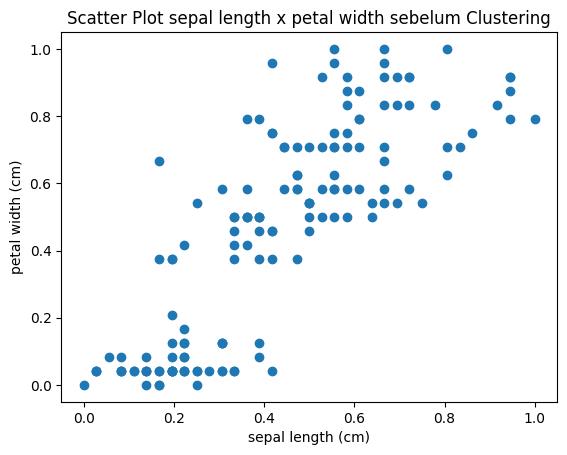

In [ ]:
plt.scatter(iris_data_scaled[:, 0], iris_data_scaled[:, 1])
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Scatter Plot sepal length x petal width sebelum Clustering')
plt.show()

- ***plt.scatter(iris_data_scaled[:, 0], iris_data_scaled[:, 1])*** = Menampilkan scatter plot dengan sumbu x dari sepal length dan sumbu y dari petal width yang sudah di normalisasi menggunakan MinMaxScaler. Data yang digunakan berasal dari dataset iris.
- ***plt.xlabel('sepal length (cm)')*** = Pemberian label sumbu x
- ***plt.ylabel('petal width (cm)')*** = Pemberian label sumbu y
- ***plt.title('Scatter Plot sepal length x petal width sebelum Clustering')*** = Pemberian judul pada plot
- ***plt.show()*** = Menampilkan plot dengan menggunakan fungsi **show()** 

Scatter plot ini menunjukkan hubungan antara sepal length dan petal width pada dataset iris sebelum dilakukan clustering.

3. **Clusterlah dataset iris dengan nilai K 2, 3, 4**

In [ ]:
k_values = [2, 3, 4]
y_values = []
centroid_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    y = kmeans.fit_predict(iris_data_scaled)
    y_values.append(y)
    centroid_values.append(kmeans.cluster_centers_)

for i, y in enumerate(y_values):
  print(f'Cluster Data dengan Nilai K={k_values[i]}\n{y}\n')
  print(f'Nilai pada cluster {k_values[i]}:\n{centroid_values[i]}\n')

Cluster Data dengan Nilai K=2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]

Nilai pada cluster 2:
[[0.20419103 0.10087719]
 [0.56630824 0.67697133]]

Cluster Data dengan Nilai K=3
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 2 0 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 2 2
 2 0]

Nilai pada cluster 3:
[[0.45951036 0.55720339]
 [0.19549266 0.07861635]
 [0.70614035 0.83333333]]

Cluster Data dengan Nilai K=4
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 3 2 3 2 3 2 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


- ***k_values = [2, 3, 4]*** = Mendefinisikan list k_values yang berisi nilai K yang akan digunakan pada algoritma KMeans.
- ***y_values = []*** = Mendefinisikan list kosong y_values yang akan digunakan untuk menyimpan nilai label cluster setiap iterasi KMeans.
- ***centroid_values = []*** = Mendefinisikan list kosong centroid_values yang akan digunakan untuk menyimpan nilai centroid setiap iterasi KMeans.
- ***for k in k_values:*** = Melakukan iterasi pada setiap nilai K pada k_values.
- ***kmeans = KMeans(n_clusters=k, random_state=0)*** = Mendefinisikan objek KMeans dengan parameter n_clusters sebesar nilai K dan random_state sebesar 0.
- ***y = kmeans.fit_predict(iris_data_scaled)*** = Melakukan fitting dan prediksi pada data yang telah dinormalisasi menggunakan objek KMeans. Hasil prediksi akan disimpan pada variabel y.
- ***y_values.append(y)*** = Menambahkan nilai y pada list y_values.
- ***centroid_values.append(kmeans.cluster_centers_)*** = Menambahkan nilai centroid dari hasil fitting pada iris_data_scaled pada list centroid_values.
- ***for i, y in enumerate(y_values):*** = Melakukan iterasi pada setiap elemen pada y_values dengan indexnya disimpan pada variabel i dan nilai elemennya disimpan pada variabel y.
- ***print(f'Cluster Data dengan Nilai K={k_values[i]}\n{y}\n')*** = Mencetak nilai label cluster pada setiap iterasi KMeans.
- ***print(f'Nilai pada cluster {k_values[i]}:\n{centroid_values[i]}\n')*** = Mencetak nilai centroid pada setiap iterasi KMeans.

4. **Tampilkan scatter plot setelah clustering**

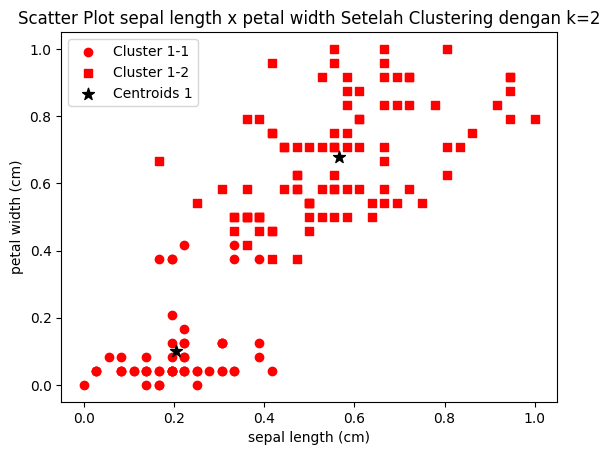

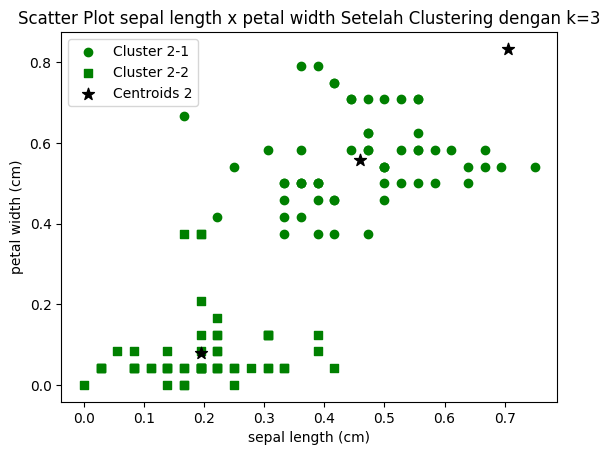

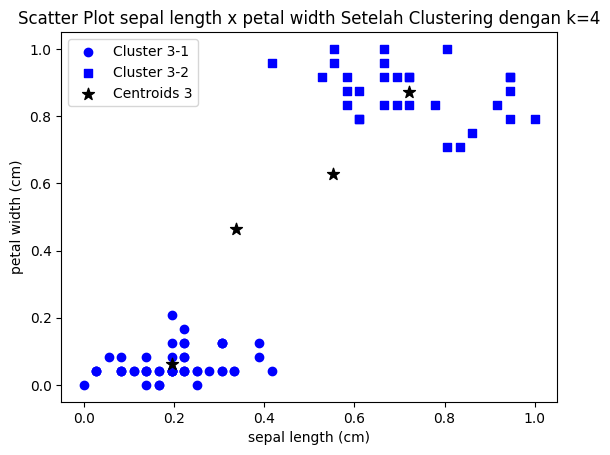

In [ ]:
colors = ['r', 'g', 'b']
for i, y in enumerate(y_values):
    plt.scatter(iris_data_scaled[:, 0][y == 0], iris_data_scaled[:, 1][y == 0], c=colors[i], label=f'Cluster {i+1}-1')
    plt.scatter(iris_data_scaled[:, 0][y == 1], iris_data_scaled[:, 1][y == 1], c=colors[i], marker='s', label=f'Cluster {i+1}-2')
    if len(centroid_values[i]) > 0:
        plt.scatter(centroid_values[i][:, 0], centroid_values[i][:, 1], s=80, c='black', marker='*', label=f'Centroids {i+1}')
    plt.xlabel('sepal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.title(f'Scatter Plot sepal length x petal width Setelah Clustering dengan k={k_values[i]}')
    plt.legend()
    plt.show()

- ***colors = ['r', 'g', 'b']*** = Menentukan warna dari masing-masing cluster pada scatter plot. Dalam hal ini, cluster pertama direpresentasikan dengan warna merah (r), cluster kedua dengan warna hijau (g), dan cluster ketiga dengan warna biru (b).
- ***for i, y in enumerate(y_values):*** = Melakukan iterasi pada setiap cluster hasil prediksi (y) dengan nilai k yang berbeda-beda. Variabel i digunakan sebagai index dan variabel y digunakan sebagai isi dari setiap elemen pada list y_values.
- ***plt.scatter(iris_data_scaled[:, 0][y == 0], iris_data_scaled[:, 1][y == 0], c=colors[i], label=f'Cluster {i+1}-1')*** : Membuat scatter plot dengan nilai x diambil dari kolom sepal length dan nilai y diambil dari kolom petal width pada iris_data_scaled. Selain itu, untuk setiap cluster, titik-titik pada scatter plot diberi warna yang sesuai dengan warna yang sudah ditentukan pada variabel colors, dan diberi label Cluster {i+1}-1 yang menunjukkan cluster ke-i pada plot.
- ***plt.scatter(iris_data_scaled[:, 0][y == 1], iris_data_scaled[:, 1][y == 1], c=colors[i], marker='s', label=f'Cluster {i+1}-2')*** = sama dengan baris sebelumnya, tetapi untuk setiap cluster ditambahkan marker dengan bentuk kotak (s) dan diberi label Cluster {i+1}-2 yang menunjukkan cluster ke-i pada plot.
- ***if len(centroid_values[i]) > 0:*** = Pengecekan apakah terdapat centroid pada cluster ke-i. Jika len(centroid_values[i]) > 0, maka scatter plot untuk centroid dibuat.
- **plt.scatter(centroid_values[i][:, 0], centroid_values[i][:, 1], s=80, c='black', marker='*', label=f'Centroids {i+1}')** = Membuat scatter plot dari centroid pada cluster ke-i. Setiap centroid diberi marker dengan bentuk bintang (*), diberi warna hitam (black), dan diberi label Centroids {i+1} yang menunjukkan centroid ke-i pada plot.
- ***plt.xlabel('sepal length (cm)')*** = Memberikan label pada sumbu x dengan teks "sepal length (cm)".
- ***plt.ylabel('petal width (cm)')*** = Memberikan label pada sumbu y dengan teks "petal width (cm)".
- ***plt.title(f'Scatter Plot sepal length x petal width Setelah Clustering dengan k={k_values[i]}')*** = Memberikan judul pada scatter plot dengan teks "Scatter Plot sepal length x petal width Setelah Clustering dengan k=...".
- ***plt.legend()*** = Menampilkan legend pada scatter plot.
- ***plt.show()*** = Menampilkan plot dengan menggunakan fungsi **show()** 

5. **Analisalah perbandingan scatter plot sebelum clustering dan setelah clustering**

Scatter plot sebelum clustering sepal length x petal width menunjukkan persebaran data dengan pola yang cenderung berkelompok, namun tidak jelas ada berapa kelompok yang terbentuk.

Setelah dilakukan clustering dengan k=2, 3, dan 4, scatter plot sepal length x petal width menunjukkan kelompok-kelompok yang jelas dan terpisah dengan baik, terutama pada k=2 dan k=3. Terlihat bahwa semakin tinggi nilai k, semakin banyak kelompok yang terbentuk, namun pada k=4, terdapat satu data yang termasuk ke dalam kelompok yang kurang jelas.

6. **Tentukan manakah k terbaik jika dilakukan analisa secara visual**


Dari hasil visualisasi scatter plot untuk sepal length x petal width dengan nilai k=2, 3, dan 4, terlihat bahwa k=2 adalah yang paling baik karena terdapat jelas pemisahan antara kedua cluster dan tidak terjadi tumpang tindih antar cluster. Pada nilai k=3 dan 4, terlihat bahwa ada beberapa titik data yang tumpang tindih antar cluster sehingga pemisahan tidak optimal

---

###**sepal width ~petal width**

In [ ]:
data = iris_data[['sepal width (cm)', 'petal width (cm)']]
data.head()

,sepal width (cm),petal width (cm)
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


Pada kode di atas, dibuat sebuah variabel data yang berisi data ***iris_data*** yang hanya memuat kolom sepal width (cm) dan petal width (cm) menggunakan method [['sepal width (cm)', 'petal width (cm)']]. Kemudian ditampilkan 5 baris pertama data tersebut menggunakan method head().

1. **Normalisasikan dataset iris menggunakan normalisasi minmax**

In [ ]:
scaler = MinMaxScaler()
iris_data_scaled = scaler.fit_transform(iris_data[['sepal width (cm)', 'petal width (cm)']])
data = pd.DataFrame(iris_data_scaled, columns=['sepal width (cm)', 'petal width (cm)'])
data.head()

,sepal width (cm),petal width (cm)
0,0.625000,0.041667
1,0.416667,0.041667
2,0.500000,0.041667
3,0.458333,0.041667
4,0.666667,0.041667


- ***scaler = MinMaxScaler()*** : Membuat objek MinMaxScaler dari library Scikit-Learn untuk melakukan normalisasi data.
- ***iris_data_scaled = scaler.fit_transform(iris_data[['sepal width (cm)', 'petal width (cm)']])*** : Melakukan normalisasi data iris pada atribut sepal width dan petal width menggunakan objek MinMaxScaler yang telah dibuat sebelumnya. Data hasil normalisasi disimpan pada variabel iris_data_scaled.
- ***data = pd.DataFrame(iris_data_scaled, columns=['sepal width (cm)', 'petal width (cm)'])*** : Membuat DataFrame baru dari data hasil normalisasi dengan kolom atribut yang sama seperti pada data awal (sepal width (cm) dan petal width (cm)). DataFrame ini disimpan pada variabel data.
- ***data.head()*** : Menampilkan lima baris pertama dari data hasil normalisasi yang telah dibuat.

2. **Tampilkan scatter plot sebelum clustering**

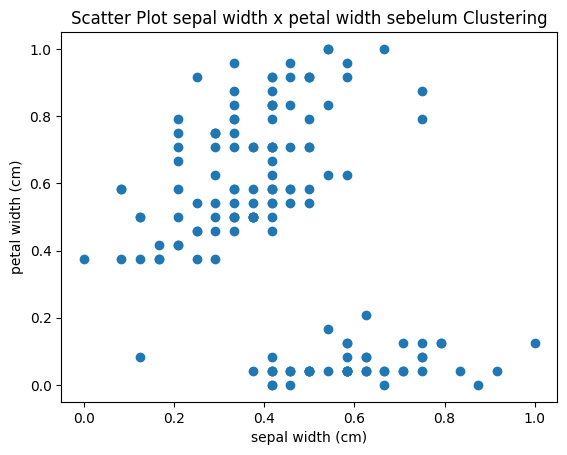

In [ ]:
plt.scatter(iris_data_scaled[:, 0], iris_data_scaled[:, 1])
plt.xlabel('sepal width (cm)')
plt.ylabel('petal width (cm)')
plt.title('Scatter Plot sepal width x petal width sebelum Clustering')
plt.show()

- ***plt.scatter(iris_data_scaled[:, 0], iris_data_scaled[:, 1])*** = Menampilkan scatter plot dengan sumbu x dari sepal width dan sumbu y dari petal width yang sudah di normalisasi menggunakan MinMaxScaler. Data yang digunakan berasal dari dataset iris.
- ***plt.xlabel('sepal width (cm)')*** = Pemberian label sumbu x
- ***plt.ylabel('petal width (cm)')*** = Pemberian label sumbu y
- ***plt.title('Scatter Plot sepal width x petal width sebelum Clustering')*** = Pemberian judul pada plot
- ***plt.show()*** = Menampilkan plot dengan menggunakan fungsi **show()** 

Scatter plot ini menunjukkan hubungan antara sepal width dan petal width pada dataset iris sebelum dilakukan clustering.

3. **Clusterlah dataset iris dengan nilai K 2, 3, 4**

In [ ]:
k_values = [2, 3, 4]
y_values = []
centroid_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    y = kmeans.fit_predict(iris_data_scaled)
    y_values.append(y)
    centroid_values.append(kmeans.cluster_centers_)

for i, y in enumerate(y_values):
  print(f'Cluster Data dengan Nilai K={k_values[i]}\n{y}\n')
  print(f'Nilai pada cluster {k_values[i]}:\n{centroid_values[i]}\n')

Cluster Data dengan Nilai K=2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]

Nilai pada cluster 2:
[[0.595      0.06083333]
 [0.36333333 0.65666667]]

Cluster Data dengan Nilai K=3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 2 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]

Nilai pada cluster 3:
[[0.60459184 0.06037415]
 [0.43402778 0.81336806]
 [0.29481132 0.50393082]]

Cluster Data dengan Nilai K=4
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 3 1 1 1 1 1 1 1 1 2 2 2 3 2 2 2 3 2 2 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


- ***k_values = [2, 3, 4]*** = Mendefinisikan list k_values yang berisi nilai K yang akan digunakan pada algoritma KMeans.
- ***y_values = []*** = Mendefinisikan list kosong y_values yang akan digunakan untuk menyimpan nilai label cluster setiap iterasi KMeans.
- ***centroid_values = []*** = Mendefinisikan list kosong centroid_values yang akan digunakan untuk menyimpan nilai centroid setiap iterasi KMeans.
- ***for k in k_values:*** = Melakukan iterasi pada setiap nilai K pada k_values.
- ***kmeans = KMeans(n_clusters=k, random_state=0)*** = Mendefinisikan objek KMeans dengan parameter n_clusters sebesar nilai K dan random_state sebesar 0.
- ***y = kmeans.fit_predict(iris_data_scaled)*** = Melakukan fitting dan prediksi pada data yang telah dinormalisasi menggunakan objek KMeans. Hasil prediksi akan disimpan pada variabel y.
- ***y_values.append(y)*** = Menambahkan nilai y pada list y_values.
- ***centroid_values.append(kmeans.cluster_centers_)*** = Menambahkan nilai centroid dari hasil fitting pada iris_data_scaled pada list centroid_values.
- ***for i, y in enumerate(y_values):*** = Melakukan iterasi pada setiap elemen pada y_values dengan indexnya disimpan pada variabel i dan nilai elemennya disimpan pada variabel y.
- ***print(f'Cluster Data dengan Nilai K={k_values[i]}\n{y}\n')*** = Mencetak nilai label cluster pada setiap iterasi KMeans.
- ***print(f'Nilai pada cluster {k_values[i]}:\n{centroid_values[i]}\n')*** = Mencetak nilai centroid pada setiap iterasi KMeans.

4. **Tampilkan scatter plot setelah clustering**

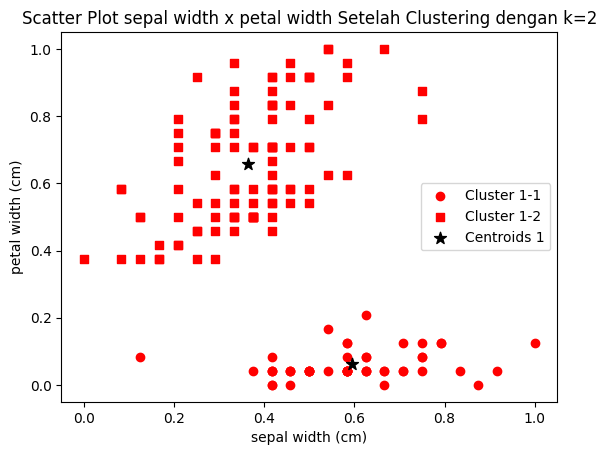

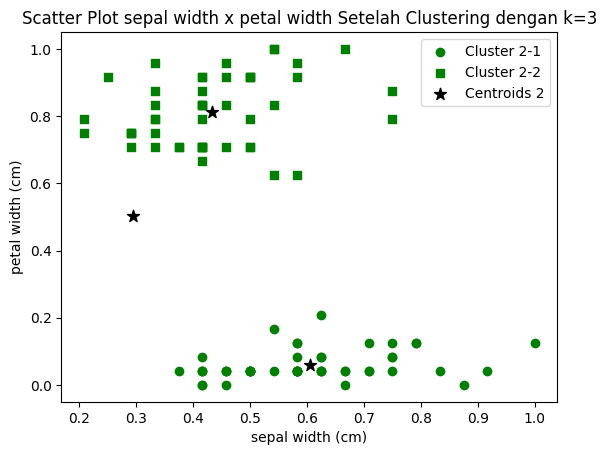

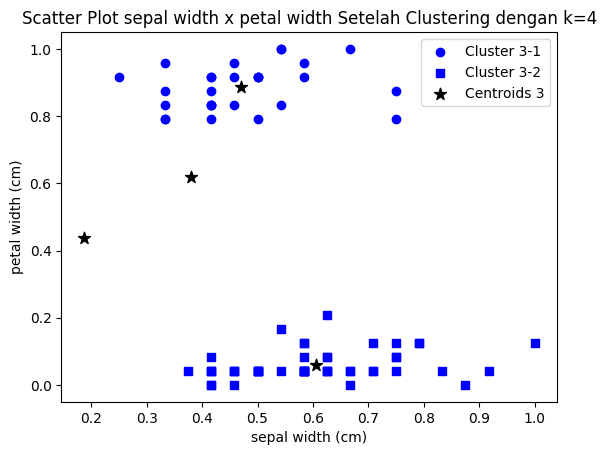

In [ ]:
colors = ['r', 'g', 'b']
for i, y in enumerate(y_values):
    plt.scatter(iris_data_scaled[:, 0][y == 0], iris_data_scaled[:, 1][y == 0], c=colors[i], label=f'Cluster {i+1}-1')
    plt.scatter(iris_data_scaled[:, 0][y == 1], iris_data_scaled[:, 1][y == 1], c=colors[i], marker='s', label=f'Cluster {i+1}-2')
    if len(centroid_values[i]) > 0:
        plt.scatter(centroid_values[i][:, 0], centroid_values[i][:, 1], s=80, c='black', marker='*', label=f'Centroids {i+1}')
    plt.xlabel('sepal width (cm)')
    plt.ylabel('petal width (cm)')
    plt.title(f'Scatter Plot sepal width x petal width Setelah Clustering dengan k={k_values[i]}')
    plt.legend()
    plt.show()

- ***colors = ['r', 'g', 'b']*** = Menentukan warna dari masing-masing cluster pada scatter plot. Dalam hal ini, cluster pertama direpresentasikan dengan warna merah (r), cluster kedua dengan warna hijau (g), dan cluster ketiga dengan warna biru (b).
- ***for i, y in enumerate(y_values):*** = Melakukan iterasi pada setiap cluster hasil prediksi (y) dengan nilai k yang berbeda-beda. Variabel i digunakan sebagai index dan variabel y digunakan sebagai isi dari setiap elemen pada list y_values.
- ***plt.scatter(iris_data_scaled[:, 0][y == 0], iris_data_scaled[:, 1][y == 0], c=colors[i], label=f'Cluster {i+1}-1')*** : Membuat scatter plot dengan nilai x diambil dari kolom sepal width dan nilai y diambil dari kolom petal width pada iris_data_scaled. Selain itu, untuk setiap cluster, titik-titik pada scatter plot diberi warna yang sesuai dengan warna yang sudah ditentukan pada variabel colors, dan diberi label Cluster {i+1}-1 yang menunjukkan cluster ke-i pada plot.
- ***plt.scatter(iris_data_scaled[:, 0][y == 1], iris_data_scaled[:, 1][y == 1], c=colors[i], marker='s', label=f'Cluster {i+1}-2')*** = sama dengan baris sebelumnya, tetapi untuk setiap cluster ditambahkan marker dengan bentuk kotak (s) dan diberi label Cluster {i+1}-2 yang menunjukkan cluster ke-i pada plot.
- ***if len(centroid_values[i]) > 0:*** = Pengecekan apakah terdapat centroid pada cluster ke-i. Jika len(centroid_values[i]) > 0, maka scatter plot untuk centroid dibuat.
- **plt.scatter(centroid_values[i][:, 0], centroid_values[i][:, 1], s=80, c='black', marker='*', label=f'Centroids {i+1}')** = Membuat scatter plot dari centroid pada cluster ke-i. Setiap centroid diberi marker dengan bentuk bintang (*), diberi warna hitam (black), dan diberi label Centroids {i+1} yang menunjukkan centroid ke-i pada plot.
- ***plt.xlabel('sepal width (cm)')*** = Memberikan label pada sumbu x dengan teks "sepal width (cm)".
- ***plt.ylabel('petal width (cm)')*** = Memberikan label pada sumbu y dengan teks "petal width (cm)".
- ***plt.title(f'Scatter Plot sepal width x petal width Setelah Clustering dengan k={k_values[i]}')*** = Memberikan judul pada scatter plot dengan teks "Scatter Plot sepal width x petal width Setelah Clustering dengan k=...".
- ***plt.legend()*** = Menampilkan legend pada scatter plot.
- ***plt.show()*** = Menampilkan plot dengan menggunakan fungsi **show()** 

5. **Analisalah perbandingan scatter plot sebelum clustering dan setelah clustering**


Dari scatter plot sebelum clustering, data memiliki persebaran yang cukup heterogen dan tidak terlihat pola yang jelas antara sepal width dan petal width.

Setelah dilakukan clustering dengan menggunakan K-Means, data terbagi menjadi beberapa cluster yang berbeda dan persebarannya menjadi lebih terlihat jelas. Terlihat juga bahwa pola yang terbentuk menjadi lebih jelas dan teratur, sehingga memudahkan untuk melakukan pengelompokan data.

Namun, jika dilihat dari scatter plot sebelum dan setelah clustering, tampaknya tidak terdapat perbedaan yang signifikan pada persebaran data di antara cluster-cluster tersebut ketika k bernilai 2 atau 3. Hal ini menunjukkan bahwa memilih k bernilai 2 atau 3 sebenarnya sudah cukup untuk mengelompokkan data secara efektif pada fitur sepal width dan petal width.

6. **Tentukan manakah k terbaik jika dilakukan analisa secara visual**

Berdasarkan hasil analisa secara visual, tidak terlihat adanya cluster yang jelas pada scatter plot sepal width x petal width baik sebelum maupun setelah dilakukan clustering. Oleh karena itu, tidak dapat ditentukan k terbaik secara visual pada scatter plot ini.

---

###**petal length ~petal width**

In [ ]:
data = iris_data[['petal length (cm)', 'petal width (cm)']]
data.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Pada kode di atas, dibuat sebuah variabel data yang berisi data ***iris_data*** yang hanya memuat kolom petal length (cm) dan petal width (cm) menggunakan method [['petal length (cm)', 'petal width (cm)']]. Kemudian ditampilkan 5 baris pertama data tersebut menggunakan method head().

1. **Normalisasikan dataset iris menggunakan normalisasi minmax**

In [ ]:
scaler = MinMaxScaler()
iris_data_scaled = scaler.fit_transform(iris_data[['petal length (cm)', 'petal width (cm)']])
data = pd.DataFrame(iris_data_scaled, columns=['petal length (cm)', 'petal width (cm)'])
data.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


- ***scaler = MinMaxScaler()*** : Membuat objek MinMaxScaler dari library Sk-Learn untuk melakukan normalisasi data.
- ***iris_data_scaled = scaler.fit_transform(iris_data[['petal length (cm)', 'petal width (cm)']])*** : Melakukan normalisasi data iris pada atribut petal length dan petal width menggunakan objek MinMaxScaler yang telah dibuat sebelumnya. Data hasil normalisasi disimpan pada variabel iris_data_scaled.
- ***data = pd.DataFrame(iris_data_scaled, columns=['petal length (cm)', 'petal width (cm)'])*** : Membuat DataFrame baru dari data hasil normalisasi dengan kolom atribut yang sama seperti pada data awal (petal length (cm) dan petal width (cm)). DataFrame ini disimpan pada variabel data.
- ***data.head()*** : Menampilkan lima baris pertama dari data hasil normalisasi yang telah dibuat.

2. **Tampilkan scatter plot sebelum clustering**

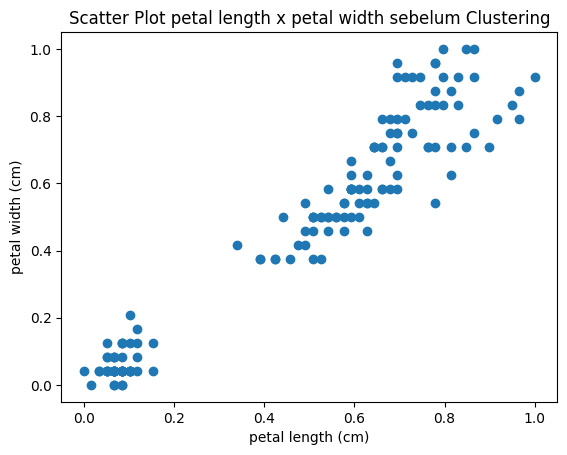

In [ ]:
plt.scatter(iris_data_scaled[:, 0], iris_data_scaled[:, 1])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Scatter Plot petal length x petal width sebelum Clustering')
plt.show()

- ***plt.scatter(iris_data_scaled[:, 0], iris_data_scaled[:, 1])*** = Menampilkan scatter plot dengan sumbu x dari petal length dan sumbu y dari petal width yang sudah di normalisasi menggunakan MinMaxScaler. Data yang digunakan berasal dari dataset iris.
- ***plt.xlabel('petal length (cm)')*** = Pemberian label sumbu x
- ***plt.ylabel('petal width (cm)')*** = Pemberian label sumbu y
- ***plt.title('Scatter Plot petal length x petal width sebelum Clustering')*** = Pemberian judul pada plot
- ***plt.show()*** = Menampilkan plot dengan menggunakan fungsi **show()** 

Scatter plot ini menunjukkan hubungan antara petal length dan petal width pada dataset iris sebelum dilakukan clustering.

3. **Clusterlah dataset iris dengan nilai K 2, 3, 4**

In [ ]:
k_values = [2, 3, 4]
y_values = []
centroid_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    y = kmeans.fit_predict(iris_data_scaled)
    y_values.append(y)
    centroid_values.append(kmeans.cluster_centers_)

for i, y in enumerate(y_values):
  print(f'Cluster Data dengan Nilai K={k_values[i]}\n{y}\n')
  print(f'Nilai pada cluster {k_values[i]}:\n{centroid_values[i]}\n')

Cluster Data dengan Nilai K=2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]

Nilai pada cluster 2:
[[0.07830508 0.06083333]
 [0.6620339  0.65666667]]

Cluster Data dengan Nilai K=3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]

Nilai pada cluster 3:
[[0.07830508 0.06083333]
 [0.7740113  0.81510417]
 [0.55867014 0.51041667]]

Cluster Data dengan Nilai K=4
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 3 2 2 2 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


- ***k_values = [2, 3, 4]*** = Mendefinisikan list k_values yang berisi nilai K yang akan digunakan pada algoritma KMeans.
- ***y_values = []*** = Mendefinisikan list kosong y_values yang akan digunakan untuk menyimpan nilai label cluster setiap iterasi KMeans.
- ***centroid_values = []*** = Mendefinisikan list kosong centroid_values yang akan digunakan untuk menyimpan nilai centroid setiap iterasi KMeans.
- ***for k in k_values:*** = Melakukan iterasi pada setiap nilai K pada k_values.
- ***kmeans = KMeans(n_clusters=k, random_state=0)*** = Mendefinisikan objek KMeans dengan parameter n_clusters sebesar nilai K dan random_state sebesar 0.
- ***y = kmeans.fit_predict(iris_data_scaled)*** = Melakukan fitting dan prediksi pada data yang telah dinormalisasi menggunakan objek KMeans. Hasil prediksi akan disimpan pada variabel y.
- ***y_values.append(y)*** = Menambahkan nilai y pada list y_values.
- ***centroid_values.append(kmeans.cluster_centers_)*** = Menambahkan nilai centroid dari hasil fitting pada iris_data_scaled pada list centroid_values.
- ***for i, y in enumerate(y_values):*** = Melakukan iterasi pada setiap elemen pada y_values dengan indexnya disimpan pada variabel i dan nilai elemennya disimpan pada variabel y.
- ***print(f'Cluster Data dengan Nilai K={k_values[i]}\n{y}\n')*** = Mencetak nilai label cluster pada setiap iterasi KMeans.
- ***print(f'Nilai pada cluster {k_values[i]}:\n{centroid_values[i]}\n')*** = Mencetak nilai centroid pada setiap iterasi KMeans.

4. **Tampilkan scatter plot setelah clustering**

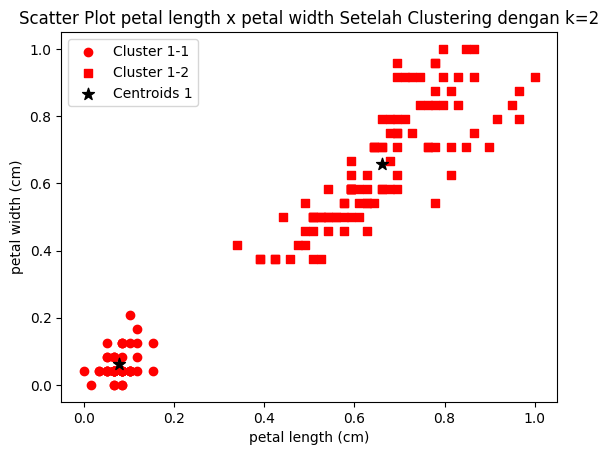

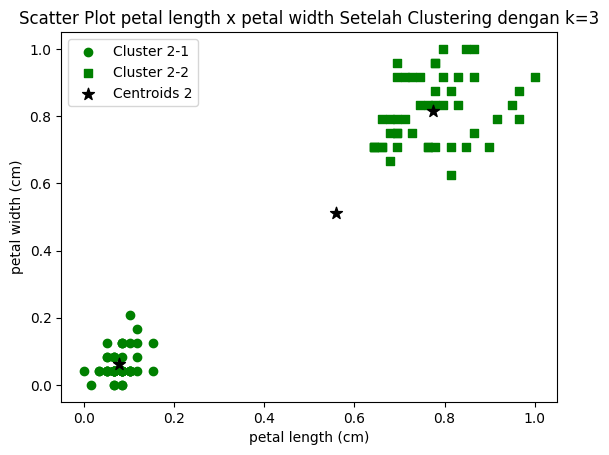

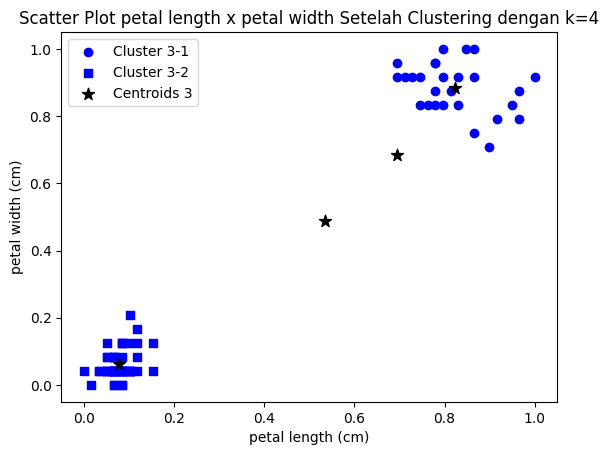

In [ ]:
colors = ['r', 'g', 'b']
for i, y in enumerate(y_values):
    plt.scatter(iris_data_scaled[:, 0][y == 0], iris_data_scaled[:, 1][y == 0], c=colors[i], label=f'Cluster {i+1}-1')
    plt.scatter(iris_data_scaled[:, 0][y == 1], iris_data_scaled[:, 1][y == 1], c=colors[i], marker='s', label=f'Cluster {i+1}-2')
    if len(centroid_values[i]) > 0:
        plt.scatter(centroid_values[i][:, 0], centroid_values[i][:, 1], s=80, c='black', marker='*', label=f'Centroids {i+1}')
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.title(f'Scatter Plot petal length x petal width Setelah Clustering dengan k={k_values[i]}')
    plt.legend()
    plt.show()

- ***colors = ['r', 'g', 'b']*** = Menentukan warna dari masing-masing cluster pada scatter plot. Dalam hal ini, cluster pertama direpresentasikan dengan warna merah (r), cluster kedua dengan warna hijau (g), dan cluster ketiga dengan warna biru (b).
- ***for i, y in enumerate(y_values):*** = Melakukan iterasi pada setiap cluster hasil prediksi (y) dengan nilai k yang berbeda-beda. Variabel i digunakan sebagai index dan variabel y digunakan sebagai isi dari setiap elemen pada list y_values.
- ***plt.scatter(iris_data_scaled[:, 0][y == 0], iris_data_scaled[:, 1][y == 0], c=colors[i], label=f'Cluster {i+1}-1')*** : Membuat scatter plot dengan nilai x diambil dari kolom petal length dan nilai y diambil dari kolom petal width pada iris_data_scaled. Selain itu, untuk setiap cluster, titik-titik pada scatter plot diberi warna yang sesuai dengan warna yang sudah ditentukan pada variabel colors, dan diberi label Cluster {i+1}-1 yang menunjukkan cluster ke-i pada plot.
- ***plt.scatter(iris_data_scaled[:, 0][y == 1], iris_data_scaled[:, 1][y == 1], c=colors[i], marker='s', label=f'Cluster {i+1}-2')*** = sama dengan baris sebelumnya, tetapi untuk setiap cluster ditambahkan marker dengan bentuk kotak (s) dan diberi label Cluster {i+1}-2 yang menunjukkan cluster ke-i pada plot.
- ***if len(centroid_values[i]) > 0:*** = Pengecekan apakah terdapat centroid pada cluster ke-i. Jika len(centroid_values[i]) > 0, maka scatter plot untuk centroid dibuat.
- **plt.scatter(centroid_values[i][:, 0], centroid_values[i][:, 1], s=80, c='black', marker='*', label=f'Centroids {i+1}')** = Membuat scatter plot dari centroid pada cluster ke-i. Setiap centroid diberi marker dengan bentuk bintang (*), diberi warna hitam (black), dan diberi label Centroids {i+1} yang menunjukkan centroid ke-i pada plot.
- ***plt.xlabel('petal length (cm)')*** = Memberikan label pada sumbu x dengan teks "petal length (cm)".
- ***plt.ylabel('petal width (cm)')*** = Memberikan label pada sumbu y dengan teks "petal width (cm)".
- ***plt.title(f'Scatter Plot petal length x petal width Setelah Clustering dengan k={k_values[i]}')*** = Memberikan judul pada scatter plot dengan teks "Scatter Plot petal length x petal width Setelah Clustering dengan k=...".
- ***plt.legend()*** = Menampilkan legend pada scatter plot.
- ***plt.show()*** = Menampilkan plot dengan menggunakan fungsi **show()** 

5. **Analisalah perbandingan scatter plot sebelum clustering dan setelah clustering**

Sebelum clustering, scatter plot petal length x petal width menunjukkan persebaran data yang cukup beragam dengan tidak terlihatnya pola tertentu.

Sedangkan setelah clustering dengan menggunakan algoritma K-Means dengan k=3, scatter plot petal length x petal width terbagi menjadi tiga kelompok yang berbeda dengan jelas. Terlihat bahwa kelompok data yang diberi warna merah lebih tersebar dan terdistribusi lebih luas daripada kelompok data berwarna hijau dan biru yang lebih padat dan terkumpul.

6. **Tentukan manakah k terbaik jika dilakukan analisa secara visual**

Berdasarkan visualisasi scatter plot sebelum dan setelah clustering pada atribut "petal length" dan "petal width", k terbaik adalah 3. Hal ini dapat dilihat dari distribusi data pada setiap cluster yang lebih terlihat jelas pada saat k = 3, dibandingkan dengan k = 2 atau k = 4. Pada k = 2, beberapa data terlihat tercampur antar cluster, sedangkan pada k = 4 terdapat cluster yang memiliki sedikit data. Oleh karena itu, k = 3 merupakan pilihan yang paling optimal untuk clustering data ini pada atribut "petal length" dan "petal width".